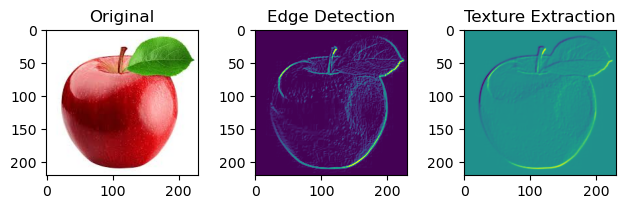

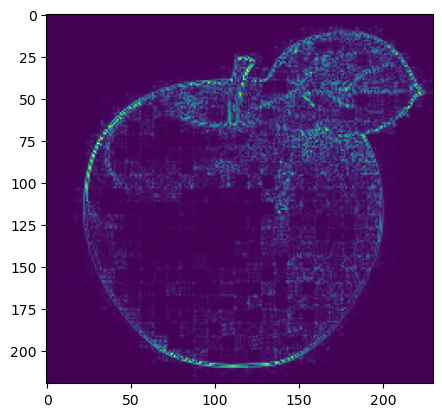

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('prog8img.jpeg')
image_mat = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

edges_x = cv2.filter2D(gray_image, -1, sobel_x)
edges_y = cv2.filter2D(gray_image, -1, sobel_y)
edges = cv2.addWeighted(edges_x, 0.5, edges_y, 0.5, 0)

sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
texture = sobelx + sobely

l_title = ["Original", "Edge Detection", "Texture Extraction"]
l_var = [image_mat, edges, texture]

fig, axs = plt.subplots(1, 3)
fig.tight_layout(pad=1.0)
for i in range(3):
    axs[i].imshow(l_var[i])
    axs[i].set_title(l_title[i])
    
plt.show()

# Another method : using built-in function
# For edges
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges)

# For texture
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))
plt.imshow(laplacian)